In [1]:

import numpy as np       
import datetime as dt
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
sys.path.append('/Users/heather/ICECAPS-ACE/DataParse/')

from utils import *
from fluxtower_parse import *

In [2]:

def get_snd(start,stop,d_loc):
    f_date_list = pd.date_range(start.date(),stop.date(),freq='1D')
    out = pd.DataFrame(columns=['Date','depth','Q','V','C','HMP1_T','depth_Tcorrected'])
    for date in f_date_list:
        f = d_loc + r'snd_%s'%(str(date.date()))
        try:
            data = pd.read_csv(f,parse_dates=[0],index_col=[0])
        except:
            print('No data for %s'%str(date.date()))
            continue

        out = out.append(data,sort=True)    
    
    # Get rid of any duplicates
    out = out[~out.index.duplicated()]   
    # Crop to datetime
    out=out[start:stop]
    
    return out

In [3]:
# Get data
dpath= '/Volumes/Data/ICECAPSarchive/fluxtower/processed/SnD/'

# Start and stop date:
all_start = dt.datetime(2019,5,30,0,0)
all_stop = dt.datetime(2019,12,10,0,0)

snd = get_snd(all_start,all_stop,dpath)


No data for 2019-08-10
No data for 2019-10-14
No data for 2019-11-14
No data for 2019-11-15
No data for 2019-11-16
No data for 2019-11-17
No data for 2019-11-18


In [4]:
snd

,C,Date,HMP1_T,Q,V,depth,depth_Tcorrected
2019-05-30 00:08:00,09,NaN,253.445833,214,11,1.347,1.297507
2019-05-30 00:19:00,10,NaN,253.402273,220,11,1.352,1.302211
2019-05-30 00:29:00,0D,NaN,252.819787,233,11,1.351,1.299751
2019-05-30 00:39:00,0F,NaN,252.016167,211,11,1.353,1.299605
2019-05-30 00:49:00,09,NaN,251.806500,206,11,1.355,1.300985
...,...,...,...,...,...,...,...
2019-12-09 23:11:00,FB,NaN,220.368478,177,11,0.984,0.883831
2019-12-09 23:21:00,01,NaN,220.886833,172,11,0.983,0.883971
2019-12-09 23:32:00,FB,NaN,220.814828,178,11,0.983,0.883827
2019-12-09 23:42:00,03,NaN,220.719778,172,11,0.981,0.881838


In [4]:
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot
from bokeh.palettes import Viridis3
from bokeh.plotting import figure
from bokeh.models import Title
from bokeh.models import Span
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter

output_notebook()

# Make the figure
p=figure(plot_width=1000,
       plot_height=400,
       y_axis_label='Distance',
       x_axis_type='datetime',
       x_range=(all_start,all_stop))

# Import the ColumnDataSource class
from bokeh.models import ColumnDataSource
# Convert dataframe to column data source

source = ColumnDataSource(snd)

new=pd.DataFrame()
new["Date"] = snd.index.to_list()
new["Date_str"] = new["Date"].apply(lambda x: str(x).replace(':','-'))
source.add(new['Date_str'],'readable_date')

# Hover tool referring to our own data field using @ and
# a position on the graph using $

#h = HoverTool(tooltips=[('date', '@x{%F}'), ('temp','@T')],
#          formatters={'DateTime': 'datetime'})

h = HoverTool(tooltips=[('date', '@readable_date'), ('temp','@T')],
          formatters={'DateTime': 'datetime'})    
    
h.mode = 'mouse'
p.line('index','depth_Tcorrected',color='blue',source=source)
#p.line(t_rad.index,t_rad,color='red')
p.add_tools(h)

show(p)

Loading BokehJS ...

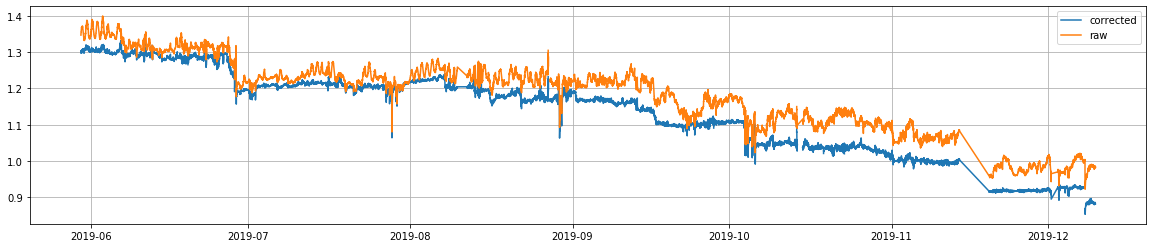

In [10]:

fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(111)
ax1.grid(True)
ax1.plot(snd['depth_Tcorrected'],label='corrected')
ax1.plot(snd['depth'],label='raw')
ax1.legend()
#ax1.set_xlim(dt.datetime(2019,8,20,0,0),dt.datetime(2019,9,2,0,0))
#ax1.plot(all_snd.index,all_snd['depth'])
#ax1.set_ylabel('Distance to snow surface (m)')